In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
stations = gpd.read_file('tables/epp.geojson')
stations = stations.drop('index', axis=1)
stations.head(2)

,xtf_id,Address,PostCode,Commune,Canton_short,BeginningOfOperation,InitialPower,TotalPower,MainCategory,SubCategory,PlantCategory,CELLCODE,Municipality,District,Canton,geometry
0,5646,Rue des Creusets 41,1948,Fionnay,VS,1958-03-07,1872000.0,1872000.0,Hydroelectric power,Hydroelectric power,Pumped storage power plant,1kmE4112N2550,Bagnes,Entremont,Valais,POINT (4112371.918 2550159.690)
1,9744,-,1934,Le Châble,VS,2007-12-20,350.0,350.0,Hydroelectric power,Hydroelectric power,Wastewater power plant,1kmE4104N2556,Bagnes,Entremont,Valais,POINT (4104455.502 2556273.398)


In [3]:
stations_subset = stations.sample(n=100000)

In [4]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [5]:
sample = stations_subset.reset_index()

In [6]:
ls_0 = []

for i in sample.iterrows():
    ls_0.append([i[1][16].x, i[1][16].y])

X = np.array(ls_0)

In [7]:
nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [8]:
far_n = []

for i in range(len(distances)):
    far_n.append(distances[i][-1])

In [9]:
near_n = []

for i in range(len(distances)):
    near_n.append(distances[i][1])

In [ ]:
dist = np.array(far_n) - np.array(near_n)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

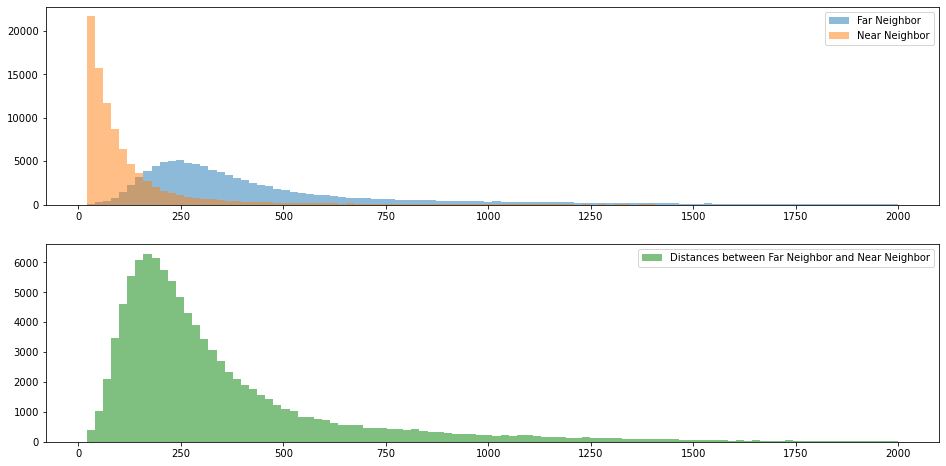

In [68]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16, 8))



ax1.hist(np.array(far_n), bins=100, zorder = 0, alpha=0.5, range = (20,2000))
ax1.hist(np.array(near_n), bins=100, zorder = 1, alpha=0.5, range = (20,2000))

ax2.hist(dist, bins=100, zorder = 0, alpha=0.5, range = (20,2000), color = 'g')

ax1.legend(['Far Neighbor','Near Neighbor'])
ax2.legend(['Distances between Far Neighbor and Near Neighbor'])

plt.show()

In [12]:
import networkx as nx

In [13]:
class station():
    def __init__(self, name):
        self.name = name
        self.coords = (0,0)

In [14]:
nodes_list = []

for i in sample.iterrows():
    a = station(i[0])
    a.coords = (i[1][16].x, i[1][16].y)
    
    nodes_list.append(a)

In [15]:
nodes = {node.name:node.coords for node in nodes_list}

In [16]:
H = nx.Graph() 
H.add_nodes_from(nodes)

links = []

for i in indices:
    for j in range(9):
        links.append((i[0],i[j+1])) 
        
H.add_edges_from(links)

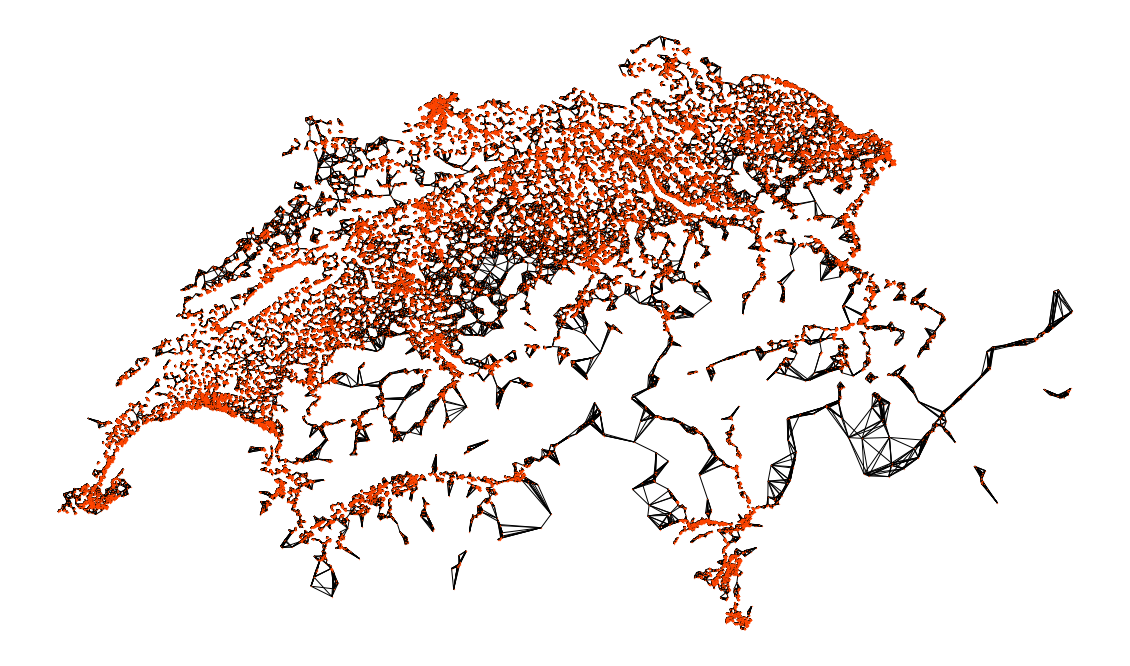

In [21]:
fig, ax = plt.subplots(figsize=(20, 12))

nx.draw(H, pos=nodes, with_labels = False, node_color='orangered', node_size=0.1, ax=ax)
plt.show()